In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
import scipy.optimize as op
import itertools
import scipy.io
import random

path = '/Users/archit-p/sources/coursera/machine-learning/machine-learning-ex3/ex3/ex3data1.mat'

In [2]:
mat = scipy.io.loadmat(path)

In [3]:
sorted(mat.keys())

['X', '__globals__', '__header__', '__version__', 'y']

In [296]:
data = mat['X']
n = len(data[0])
m = len(data)

x = np.ones(shape=(m, n+1))
x[:, 1:] = data

y = np.array(mat['y'])
y = np.where(y == 10, 0, y).reshape(m)

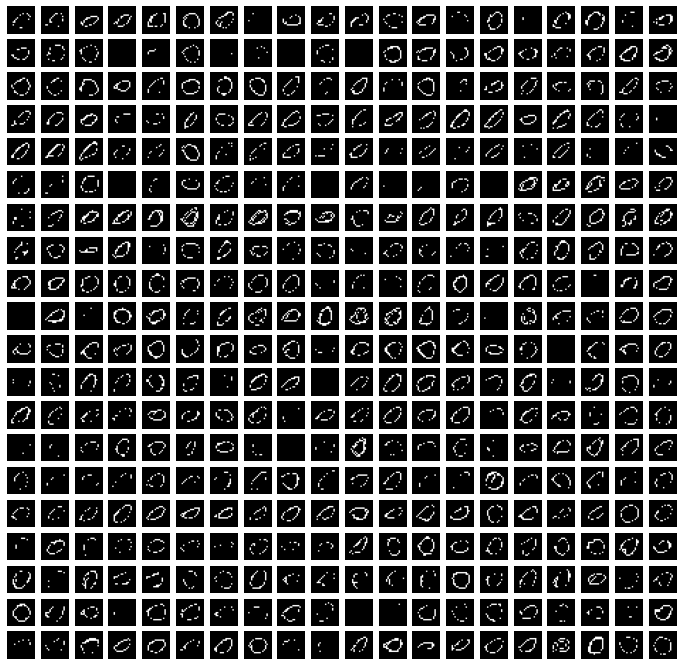

CPU times: user 11.7 s, sys: 151 ms, total: 11.9 s
Wall time: 11.4 s


In [297]:
%%time
fig, axs = plt.subplots(20, 20)
fig.set_figwidth(12)
fig.set_figheight(12)

for i in range(20):
    for j in range(20):
        cur = i * 20 + j
        pixels = np.array(data[cur], 'uint8')
        pixels = pixels.reshape((20, 20))
        axs[i, j].imshow(pixels, cmap='gray')
        axs[i, j].axis('off')

plt.show()

In [298]:
x.shape

(5000, 401)

In [299]:
y.shape

(5000,)

In [300]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [301]:
def hypothesis(theta, x):
    return sigmoid(np.matmul(x, theta))

In [302]:
def mse(theta, lamda, x, y):
#     theta = theta.reshape(n + 1, 1)
    sum = - np.matmul(np.transpose(y), np.log(hypothesis(theta, x))) - np.matmul(np.transpose(1 - y), np.log(1 - hypothesis(theta, x)))
    sum += lamda * np.sum(theta ** 2) / 2
    sum -= lamda * theta[0] ** 2 / 2
    return sum / m

In [303]:
def gradient(theta, lamda, x, y):
#     theta = theta.reshape(n + 1, 1)
    res = np.matmul(np.transpose(x), hypothesis(theta, x) - y) / m
    res += lamda * theta / m
    res[0] -= lamda * theta[0] / m
    return res

In [304]:
%%time
lamda = 1
k = 10

theta = np.zeros(shape=(k, n+1))
for i in range(k):
    training_y = np.where(y == i, 1, 0)
    result = op.minimize(fun = mse,
                        x0 = theta[i],
                        args = (lamda, x, training_y),
                        method = 'TNC',
                        jac = gradient);
    theta[i] = result.x

CPU times: user 8.93 s, sys: 407 ms, total: 9.34 s
Wall time: 2.35 s


In [306]:
theta.shape

(10, 401)

In [307]:
def predict(x):
    probs = np.zeros(shape=(len(x), k))
    for i in range(k):
        probs[:, i] = hypothesis(theta[i], x)
    return np.argmax(probs, axis=1)

In [308]:
def accuracy(x, y):
    predictions = predict(x)
    return np.mean(predictions == y)

In [309]:
accuracy(x, y)

0.9446